# Quantum Phase Estimation (QPE) Algorithm

QPE는 다음과 같은 문제를 해결한다:
> 단위리 연산자 $U$의 고유벡터 $|\psi\rangle$에 대해 $U|\psi\rangle = e^{2\pi i \theta}|\psi\rangle$ 이라면, $\theta$ 값을 추정하라.

---

## 알고리즘 개요

1. 추정용 큐비트 $n$개는 Hadamard 게이트를 통해 superposition 상태로 초기화
2. 타겟 큐비트는 $|\psi\rangle$ 고유벡터로 초기화 (예: $|1\rangle$)
3. 각 추정용 큐비트는 제어된 $U^{2^j}$ 연산에 연결
4. 역 QFT를 적용하여 $\theta$를 추출
5. 측정을 통해 2진수 근사값 얻기


In [66]:
!pip install "qiskit[visualization]" qiskit-aer --quiet

In [67]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt


## Step 1: 추정할 위상값 정의

In [68]:
theta = 0.125  # 우리가 추정하고자 하는 θ (e^{2πiθ} 형태의 위상)

## 코드 요약 및 해설

- 이 코드는 Quantum Phase Estimation (QPE) 알고리즘에서 사용할 위상값 `theta`를 정의한다.
- `theta`는 유니터리 연산자의 고유값에서 추정 대상이 되는 위상 값이다.
- 이 실험에서는 `theta = 0.125`로 설정하여, 해당 위상을 얼마나 정확히 추정할 수 있는지를 확인한다.

---

## Addition

### 1. theta의 의미

- QPE 알고리즘은 특정 유니터리 연산자에 대한 위상 정보를 추출하는 알고리즘이다.
- 위상 `theta`는 0과 1 사이의 실수이며, 출력 결과는 이 값을 이진수로 근사한 형태로 나타낸다.

### 2. theta = 0.125의 특성

- `theta = 0.125`는 10진수로 1/8이며, 2진수로는 `0.001`에 해당한다.
- 따라서 위상 추정용 큐비트를 3개 사용하면 이 값을 정확하게 표현할 수 있다.
- 이 경우 QPE 알고리즘의 출력 결과는 `'001'`이 될 것으로 기대된다.

## Step 2: QPE 회로 구성

In [69]:
# 총 4개의 큐비트와 3개의 고전 비트
qc = QuantumCircuit(4, 3)  # 3개의 큐비트는 위상 추정용, 마지막 1개의 큐비트는 타겟용

# 위 추정용 큐비트에 Hadamard 게이트 적용
qc.h(0)
qc.h(1)
qc.h(2)

# 타겟 큐비트는 X게이트를 이용하여 |1⟩ 상태 (고유벡터 역할)
qc.x(3)


## 코드 요약 및 해설

- 이 코드는 Quantum Phase Estimation (QPE) 회로의 초기 상태를 구성하는 부분이다.
- 총 4개의 큐비트를 사용하며, 이 중 3개는 위상 추정을 위한 큐비트이고 1개는 타겟 유니터리 연산에 대한 고유벡터 역할을 한다.
- 클래식 비트는 측정을 위해 3개가 필요하다.

---

## Addition

### 1. 회로 구성

- `QuantumCircuit(4, 3)`는 4개의 양자 큐비트와 3개의 클래식 비트를 생성합니다.
  - 큐비트 0, 1, 2: 위상 추정용
  - 큐비트 3: 타겟 큐비트 (고유벡터 역할)

### 2. 초기화 과정

- 위상 추정용 큐비트 0, 1, 2에 Hadamard 게이트를 적용하여, 균등한 상태로 만든다.
  - 이 과정을 통해 병렬적으로 다양한 위상 정보를 탐색할 수 있게 된다.
- 타겟 큐비트(큐비트 3)는 `X` 게이트를 적용하여 `|1⟩` 상태로 준비한다.
  - 이 큐비트는 위상 정보를 가진 유니터리 연산자의 고유벡터로 사용된다.


## Step 3: 제어된 U 연산 적용 (Controlled Phase Gates)

In [70]:
# 위상에 따라 cp 게이트( Controlled-Phase 게이트)를 적용
#각 추정용 큐비트가 타겟 큐비트에 위상을 제어하는 방식으로 연결
qc.cp(2 * np.pi * theta, 2, 3)      # 추정 큐비트 2번: U^1 (2^0 배 위상)
qc.cp(4 * np.pi * theta, 1, 3)      # 추정 큐비트 1번: U^2 (2^1 배 위상)
qc.cp(8 * np.pi * theta, 0, 3)      # 추정 큐비트 0번: U^4 (2^2 배 위상)

## 코드 요약 및 해설

- 이 코드는 위상 추정 알고리즘의 핵심 단계인 **U^(2^k)** 연산을 구현한 부분이다.
- Controlled-Phase (cp) 게이트를 사용하여, 추정용 큐비트 각각이 타겟 큐비트에 위상 정보를 적용하도록 구성한다.
- 이 과정은 θ 값을 추정용 큐비트 상태에 인코딩하는 역할을 한다.

---

## Addition

### 1. 위상 적용의 원리

- 위상 추정 알고리즘에서는 각 추정 큐비트에 대해 유니터리 연산 \( U^{2^k} \)를 제어된 형태로 적용해야 한다.
- 여기서는 유니터리 연산이 단순한 위상 회전이므로, `cp` 게이트로 이를 간단하게 구현할 수 있다.

### 2. 각 게이트의 의미

- `qc.cp(2 * np.pi * theta, 2, 3)`  
  - 추정 큐비트 2번이 타겟 큐비트에 위상을 한 번 적용  
  - 이는 유니터리 연산 U의 1제곱에 해당

- `qc.cp(4 * np.pi * theta, 1, 3)`  
  - 추정 큐비트 1번이 타겟 큐비트에 두 배 크기의 위상을 적용  
  - U의 2제곱에 해당

- `qc.cp(8 * np.pi * theta, 0, 3)`  
  - 추정 큐비트 0번이 타겟 큐비트에 네 배 크기의 위상을 적용  
  - U의 4제곱에 해당

- 위상은 추정 큐비트의 위치에 따라 두 배씩 증가하며 적용된다.



## Step 4: 역 QFT 적용

In [71]:
# 역 QFT (Quantum Fourier Transform)의 수동 구현 - 3비트용

qc.swap(0, 2)               # 큐비트 순서 반전 (QFT는 출력 순서를 반대로 정렬)
qc.h(0)                     # Hadamard 게이트로 큐비트 0에 주파수 성분 분리 시작
qc.cp(-np.pi/2, 0, 1)       # 큐비트 0과 1 사이 위상 보정 (1/2 위상)
qc.cp(-np.pi/4, 0, 2)       # 큐비트 0과 2 사이 위상 보정 (1/4 위상)
qc.h(1)                     # 큐비트 1에 Hadamard 적용 (주파수 해석)
qc.cp(-np.pi/2, 1, 2)       # 큐비트 1과 2 사이 위상 보정 (1/2 위상)
qc.h(2)                     # 마지막 큐비트 2에 Hadamard 적용

## 코드 요약 및 해설

- 이 코드는 3비트용 역 QFT (Quantum Fourier Transform)를 수동으로 구현한 부분이다.
- Qiskit에서 기본 QFT 게이트는 `AerSimulator`에서 오류를 발생시킬 수 있기 때문에, 기본 게이트만으로 직접 작성한다.
- 위상 추정 알고리즘에서 위상 정보를 읽기 전에 반드시 수행해야 하는 단계이다.

---

## Addition

### 1. 역 QFT의 필요성

- 위상 추정 과정에서 위상 정보는 각 큐비트의 위상 차이로 인코딩된다.
- 역 QFT를 통해 이러한 위상 정보를 이진수로 변환하여 측정 가능한 형태로 바꿔준다.

### 2. 코드 구성 설명

- `qc.swap(0, 2)`  
  - QFT는 출력 비트 순서를 반대로 정렬하므로, 큐비트 순서를 미리 바꿔준다.

- `qc.h(0)`  
  - 큐비트 0에 Hadamard 게이트 적용 → 주파수 성분 분리 시작

- `qc.cp(-np.pi/2, 0, 1)`  
  - 큐비트 0과 1 사이의 위상 보정 (1/2 회전)

- `qc.cp(-np.pi/4, 0, 2)`  
  - 큐비트 0과 2 사이의 위상 보정 (1/4 회전)

- `qc.h(1)`  
  - 큐비트 1에 Hadamard 게이트 적용

- `qc.cp(-np.pi/2, 1, 2)`  
  - 큐비트 1과 2 사이의 위상 보정 (1/2 회전)

- `qc.h(2)`  
  - 마지막 큐비트 2에 Hadamard 게이트 적용하여 주파수 정보 해석 완료

## Step 5: 측정

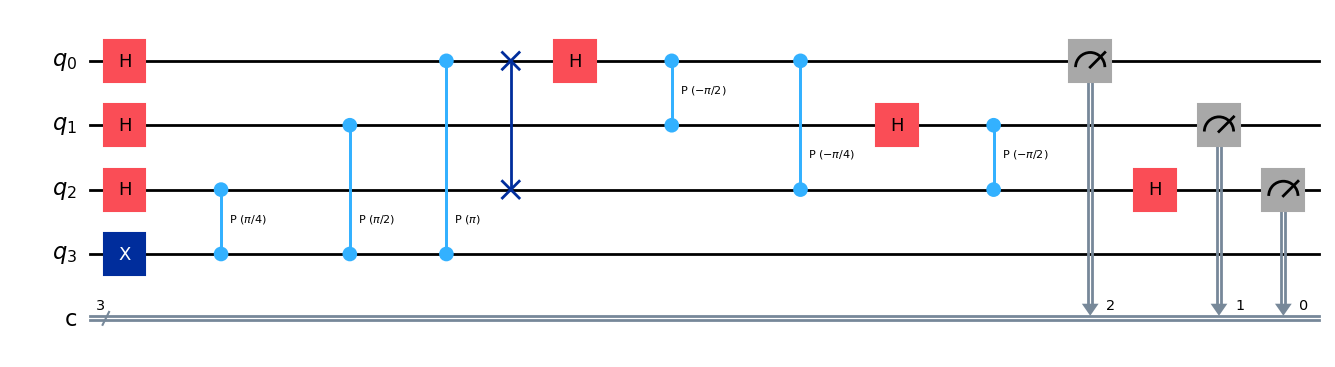

In [72]:
# 측정
# 큐비트 2, 1, 0을 각각 클래식 비트 0, 1, 2에 측정값으로 저장
# 이렇게 순서를 반대로 지정하는 이유는 Qiskit의 큐비트 순서가 LSB → MSB이기 때문
# 결과를 사람이 읽는 일반적인 이진수 형태(MSB → LSB)로 보기 위해 측정 순서를 반대로 설정

qc.measure([2, 1, 0], [0, 1, 2])  # MSB를 왼쪽에, LSB를 오른쪽에 오도록 정렬
qc.draw('mpl')  # 회로 시각화


## 코드 요약 및 해설

- 이 코드는 QPE 회로에서 위상 추정 큐비트의 상태를 측정하여, 고전적인 이진수로 결과를 출력하는 단계이다.
- 큐비트 2, 1, 0을 각각 클래식 비트 0, 1, 2에 매핑함으로써, 최종 측정 결과가 일반적인 이진수 순서로 출력되도록 한다.

---

## Addition

### 1. 측정 순서의 이유

- Qiskit에서는 큐비트 번호가 클수록 **상위 비트(MSB)**가 아니라 **하위 비트(LSB)**로 해석되는 구조이다.
- 예를 들어 기본적으로 `measure([0,1,2], [0,1,2])`라고 하면, 실제로는 결과가 `LSB → MSB` 순서로 출력된다.
- 하지만 우리는 사람이 읽기 쉬운 `MSB → LSB` 형태의 이진수로 결과를 보고자 하므로,
  - 측정 순서를 **반대로 지정**하여 결과값을 정방향 이진수처럼 보이게 한다.

### 2. 코드 설명

- `qc.measure([2, 1, 0], [0, 1, 2])`
  - 큐비트 2 → 클래스 비트 0 (가장 왼쪽 비트)
  - 큐비트 0 → 클래스 비트 2 (가장 오른쪽 비트)
  - 결과적으로 `'001'`, `'101'` 등과 같은 일반적인 이진수 형태로 해석 가능


## Step 6: 시뮬레이션 및 결과 시각화

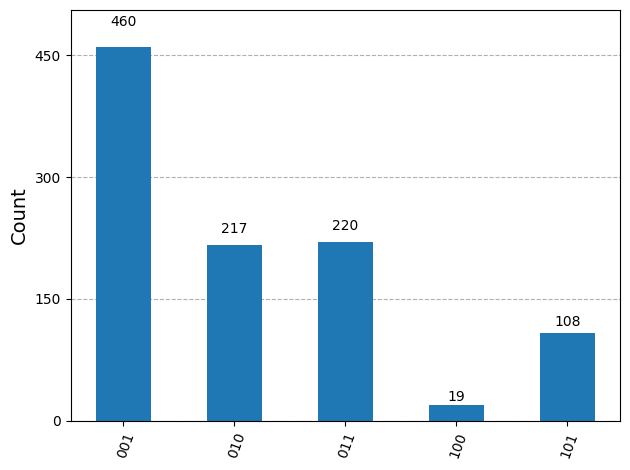

In [73]:
# 시뮬레이터 실행 (1024)
simulator = AerSimulator()
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

# 결과 시각화
hist = plot_histogram(counts)
display(hist)

## 결과 해석

이번 실험에서는 추정하고자 하는 위상 `theta`의 값이 0.125로 설정되어 있으며, 이는 2진수로 `0.001`에 해당한.  
따라서 위상 추정 결과에서 가장 많이 등장해야 하는 이진 출력은 `'001'`이다.

그래프를 보면 `'001'`이 460회로 가장 높은 빈도를 보이며, 이는 우리가 의도한 위상 `0.125`를 정확히 추정한 결과이다.

그 외에도 `'010'`, `'011'`, `'101'` 등 다른 이진 값들이 일부 등장했지만, 이는 양자 측정의 확률적 특성에 따른 것으로 자연스러운 현상이다.